In [1]:
import cv2 
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import random
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

DATADIR = './train/'
CATEGORIES = ["Bye", "Hello", "Hey","lol", "Welcome", "thanks"]

IMG_SIZE = 80

training_data = []


def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        classNum = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            img_array = cv2.flip(img_array, 1)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)  )
            training_data.append([new_array, classNum])


2024-10-20 21:29:32.975202: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 21:29:33.001803: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 21:29:33.008742: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-20 21:29:33.024143: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-20 21:29:34.114174: W tensorflow/compiler/tf2

2


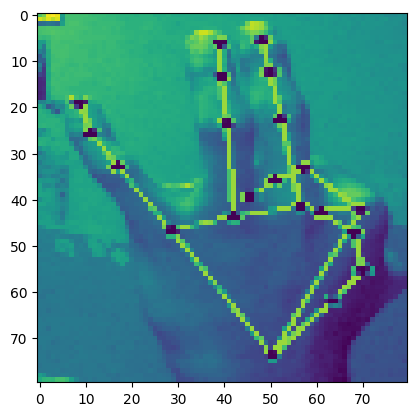

5


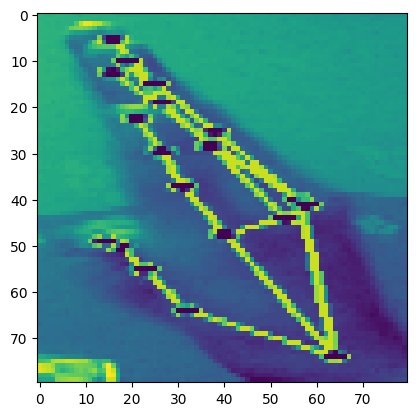

3


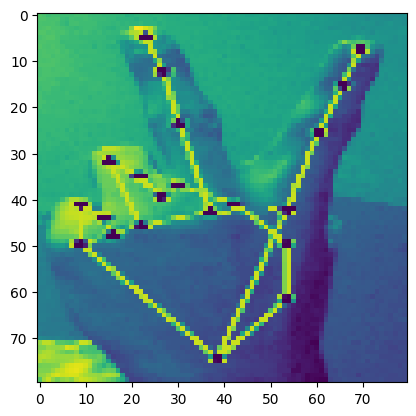

3


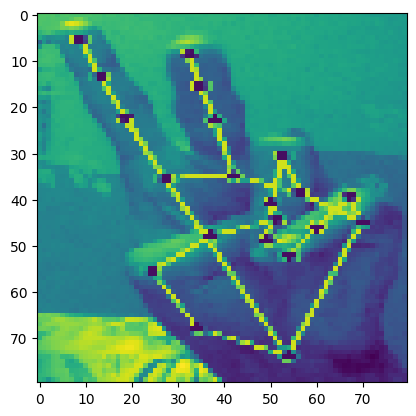

4


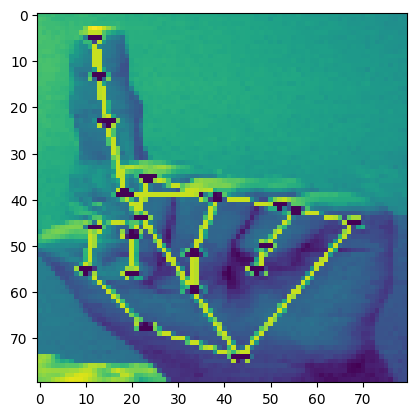

5


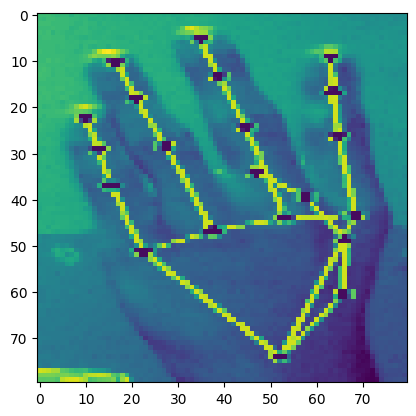

4


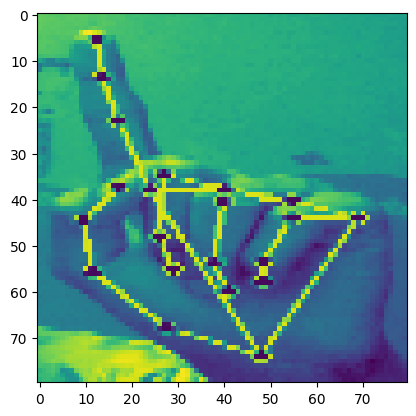

2


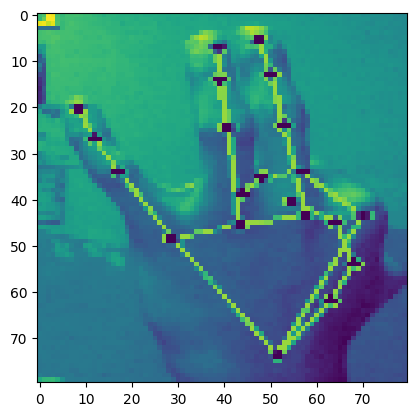

1


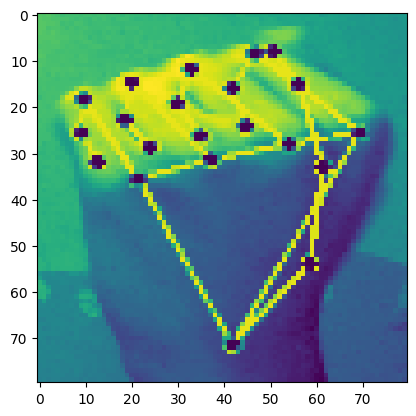

4


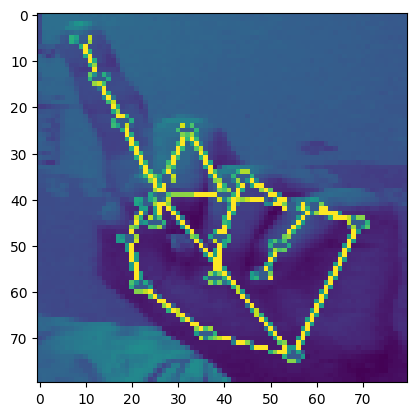

In [2]:

create_training_data()
random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])
    plt.imshow(sample[0])
    plt.show()

X = []
y = []

for features, label in training_data:
    X.append(features / 255.0)
    y.append(label)

if not isinstance(X, np.ndarray) or not isinstance(y, np.ndarray):
    X = np.array(X)
    y = np.array(y)


In [3]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = keras.models.Sequential([
        keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,1)),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Flatten() ,
        keras.layers.Dense(256,activation='relu'),
        keras.layers.Dense(128,activation='relu'),
        keras.layers.Dense(512,activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(6,activation='softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(f'X : {len(X)}')
print(f'Y : {len(y)}')


X : 600
Y : 600


/home/hassan/anaconda3/envs/computerVision/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1729448978.764308   16422 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-20 21:29:38.807711: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the requ

In [4]:

model.fit(X_train, y_train, epochs=10,batch_size=32)


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.3431 - loss: 2.0827
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.8706 - loss: 0.3658
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.9442 - loss: 0.2004
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.9706 - loss: 0.0706
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.9987 - loss: 0.0094
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.9962 - loss: 0.0064
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.9933 - loss: 0.0133
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.9978 - loss: 0.0053
Epoch 9/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.9969 - loss: 0.0221
Epoch 10/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.9951 - loss: 0.0223


In [7]:
test = cv2.imread("./test/8.png", cv2.IMREAD_GRAYSCALE)
test = cv2.resize(test, (IMG_SIZE, IMG_SIZE))
test = (np.expand_dims(test, 0))
pre = model.predict(test)[0]
score = tf.nn.softmax(pre)



print(f'{CATEGORIES[np.argmax(pre)]}')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Welcome
